<h2 style="text-align: center;"> Business Case: Aerofit - Descriptive Statistics & Probability</h2><br>

![Aerofit](aerofit.png "https://aerofit.co/wp-content/uploads/2022/01/Aerofit-Website-Banners-1-imresizer.jpg") 


### About Aerofit 
Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


### Business Problem
The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.
- Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
- For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.


### Columns info:-
The company collected the data on individuals who purchased a treadmill from the AeroFit stores during the prior three months. The dataset has the following features:

- Product Purchased: KP281, KP481, or KP781
- Age: In years
- Gender: Male/Female
- Education: In years
- MaritalStatus: Single or partnered
- Usage: The average number of times the customer plans to use the treadmill each week.
- Income: Annual income (in dollars)
- Fitness: Self-rated fitness on a 1-to-5 scale, where 1 is the poor shape and 5 is the excellent shape.
- Miles: The average number of miles the customer expects to walk/run each week

### Product Portfolio:
- The KP281 is an entry-level treadmill that sells for 1,500 dollars.
- The KP481 is for mid-level runners that sell for 1,750 dollars.
- The KP781 treadmill is having advanced features that sell for 2,500 dollars.

In [1]:
import math
from datetime import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns # All palettes -> https://r02b.github.io/seaborn_palettes/
sns.set_theme(style="whitegrid")

import matplotlib.pylab as pylab
params = {
    'figure.titlesize': 'xx-large',
    'legend.fontsize': 'x-large',
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

import plotly.express as px 
from wordcloud import WordCloud
import squarify

import warnings
warnings.filterwarnings('ignore')

In [2]:
dataset_link = 'https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749'
df = pd.read_csv(dataset_link)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [3]:
# checking shape
df.shape

(180, 9)

In [4]:
#columns info
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['product', 'age', 'gender', 'education', 'maritalstatus', 'usage',
       'fitness', 'income', 'miles'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product        180 non-null    object
 1   age            180 non-null    int64 
 2   gender         180 non-null    object
 3   education      180 non-null    int64 
 4   maritalstatus  180 non-null    object
 5   usage          180 non-null    int64 
 6   fitness        180 non-null    int64 
 7   income         180 non-null    int64 
 8   miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [7]:
# duplicate rows ?
df.duplicated().any()

False

In [8]:
# No missing values in any column
df.isnull().sum()

product          0
age              0
gender           0
education        0
maritalstatus    0
usage            0
fitness          0
income           0
miles            0
dtype: int64

In [9]:
# Percentage of unique data for each column
df.nunique() / df.shape[0] * 100

product           1.666667
age              17.777778
gender            1.111111
education         4.444444
maritalstatus     1.111111
usage             3.333333
fitness           2.777778
income           34.444444
miles            20.555556
dtype: float64

In [10]:
categorical_columns = df.select_dtypes(include = 'object').columns
numerical_columns = df.select_dtypes(exclude = 'object').columns

categorical_columns, numerical_columns

(Index(['product', 'gender', 'maritalstatus'], dtype='object'),
 Index(['age', 'education', 'usage', 'fitness', 'income', 'miles'], dtype='object'))

# Analysis
-> **Summed up the outliers analysis, customers profiling, insights and recommendations at the end of notebook**

## Product categories - KP281, KP481, KP781

In [11]:
df['product'].value_counts()

product
KP281    80
KP481    60
KP781    40
Name: count, dtype: int64

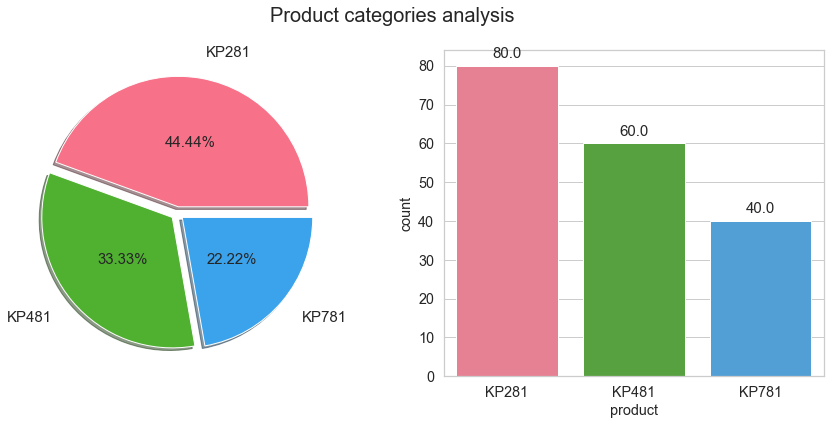

In [12]:
fig = plt.subplots(nrows = 1,ncols = 2, figsize = (15, 6))

plt.subplot(1,2,1)
y = np.array(df['product'].value_counts().values)
mylabels = df['product'].value_counts().index
plt.pie(y, labels = mylabels, autopct='%1.2f%%', pctdistance = 0.5, labeldistance = 1.2,
        colors = [sns.color_palette('husl')[0], sns.color_palette('husl')[2], sns.color_palette('husl')[4]],
        textprops = {"fontsize":15}, shadow=True, explode=[0.05,0.05,0.05])

plt.subplot(1,2,2)
ax = sns.countplot(data=df, x='product', palette='husl')
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, bar.get_height(),
            horizontalalignment='center', fontsize = 15)

plt.suptitle('Product categories analysis', fontsize=20)
plt.show()

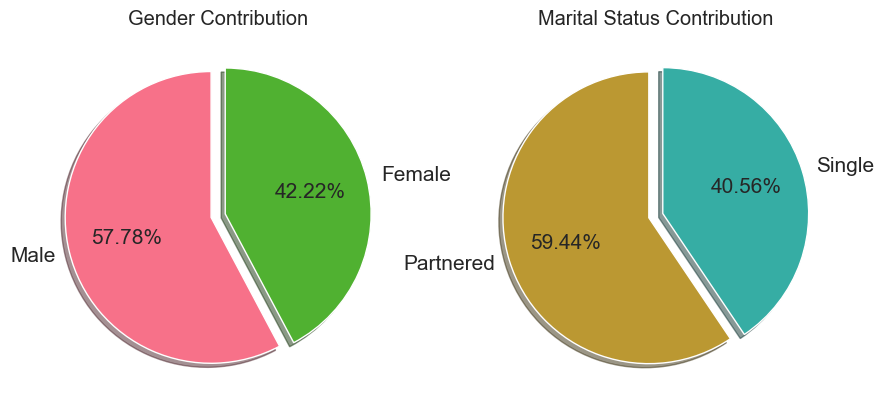

In [13]:
fig= plt.figure(figsize=(16,8), dpi = 100)

a1 = fig.add_subplot(131)
a1.pie(x=df['gender'].value_counts(), startangle=90, shadow=True, explode=[0.05,0.05],
        autopct='%1.2f%%', labels=df['gender'].value_counts().index, textprops = {"fontsize":15},
        colors = [sns.color_palette('husl')[0], sns.color_palette('husl')[2]])
a1.set_title('Gender Contribution')

a2 = fig.add_subplot(132)
a2.pie(x=df['maritalstatus'].value_counts(), startangle=90, shadow=True, explode=[0.05,0.05],
        autopct='%1.2f%%', labels=df['maritalstatus'].value_counts().index, textprops = {"fontsize":15},
        colors = [sns.color_palette('husl')[1], sns.color_palette('husl')[3]])
a2.set_title('Marital Status Contribution')

plt.show()

## Gender & Product

In [14]:
df['gender'].value_counts()

gender
Male      104
Female     76
Name: count, dtype: int64

In [15]:
round(pd.crosstab([df['gender']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
gender,,,,
Female,22.22%,16.11%,3.89%,42.22%
Male,22.22%,17.22%,18.33%,57.78%
All,44.44%,33.33%,22.22%,100.0%


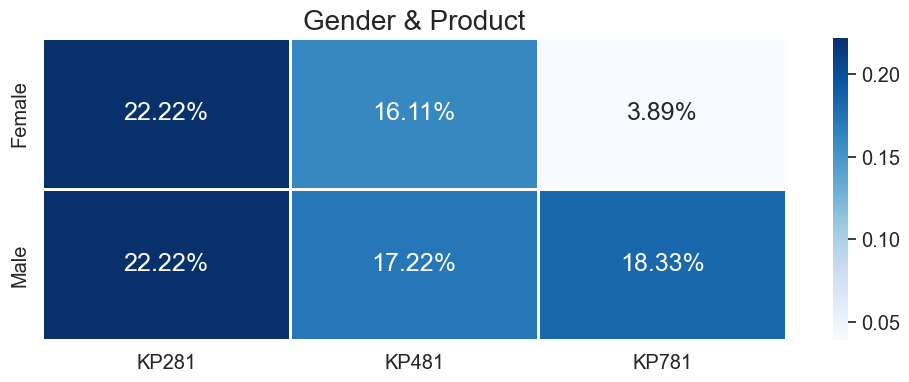

In [16]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['gender']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='Blues', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Gender & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

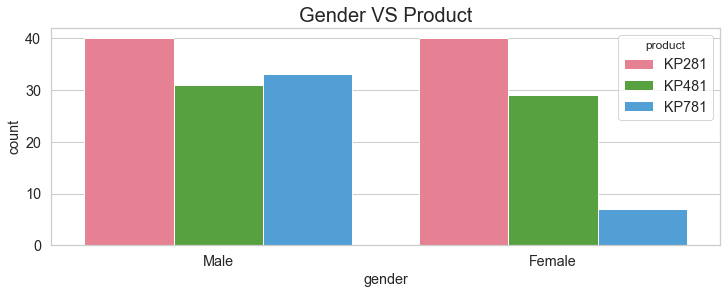

In [17]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='gender', hue='product', palette='husl')

plt.title(f'Gender VS Product', fontsize=20)
plt.show()

## Marital Status & Product

In [18]:
df['maritalstatus'].value_counts()

maritalstatus
Partnered    107
Single        73
Name: count, dtype: int64

In [19]:
round(pd.crosstab([df['maritalstatus']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
maritalstatus,,,,
Partnered,26.67%,20.0%,12.78%,59.44%
Single,17.78%,13.33%,9.44%,40.56%
All,44.44%,33.33%,22.22%,100.0%


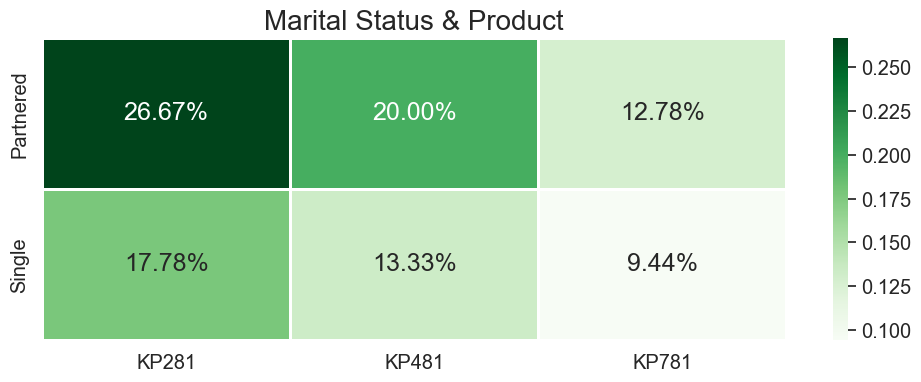

In [20]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['maritalstatus']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='Greens', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Marital Status & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

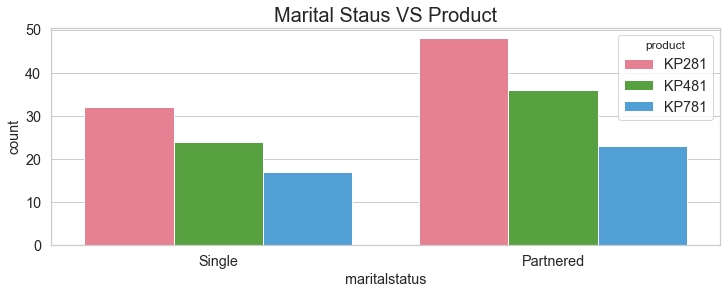

In [21]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='maritalstatus', hue='product', palette='husl')

plt.title(f'Marital Staus VS Product', fontsize=20)
plt.show()

## Gender & Marital Status & Product

In [22]:
round(pd.crosstab([df['gender'], df['maritalstatus']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product                KP281   KP481   KP781     All
gender maritalstatus                                
Female Partnered       15.0%   8.33%   2.22%  25.56%
       Single          7.22%   7.78%   1.67%  16.67%
Male   Partnered      11.67%  11.67%  10.56%  33.89%
       Single         10.56%   5.56%   7.78%  23.89%
All                   44.44%  33.33%  22.22%  100.0%

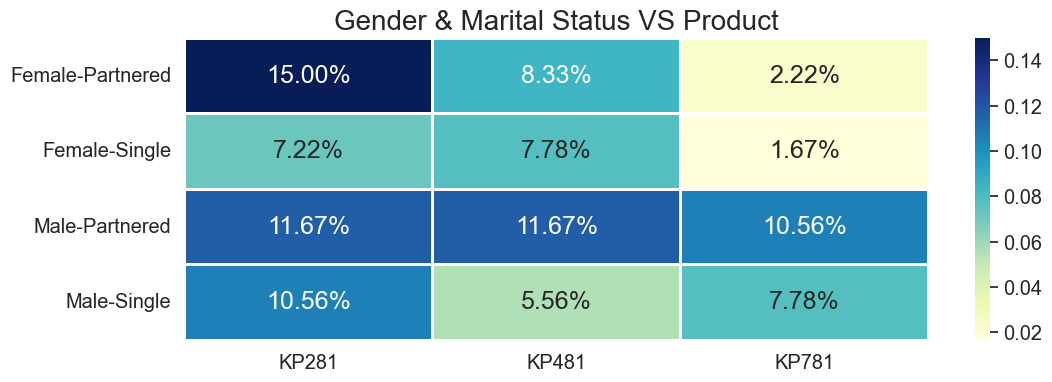

In [23]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['gender'],  df['maritalstatus']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='YlGnBu', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Gender & Marital Status VS Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Male Customer')

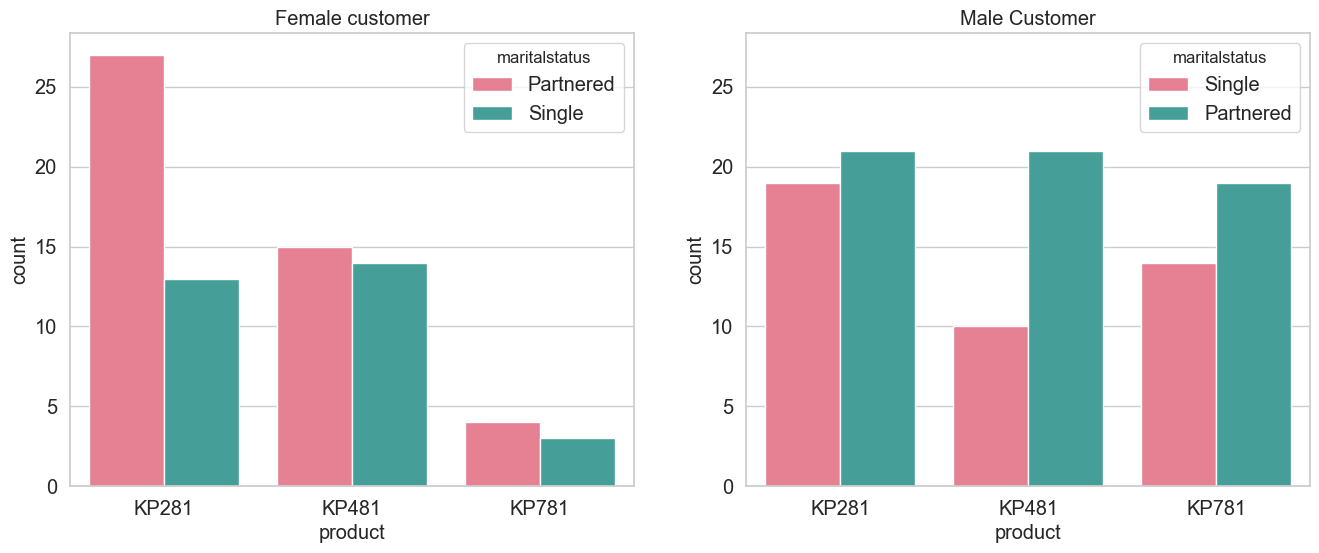

In [24]:
#fig,ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig = plt.figure(figsize = (16, 6), dpi=100)

fig1 = fig.add_subplot(1,2,1)
sns.countplot(data=df[df['gender'] == 'Female'], x='product', hue='maritalstatus', palette='husl')
plt.title('Female customer')

fig.add_subplot(1,2,2, sharey=fig1)
sns.countplot(data=df[df['gender'] == 'Male'], x='product', hue='maritalstatus', palette='husl')
plt.title('Male Customer')

## Numerical columns:  age, education, usage, fitness, income, miles

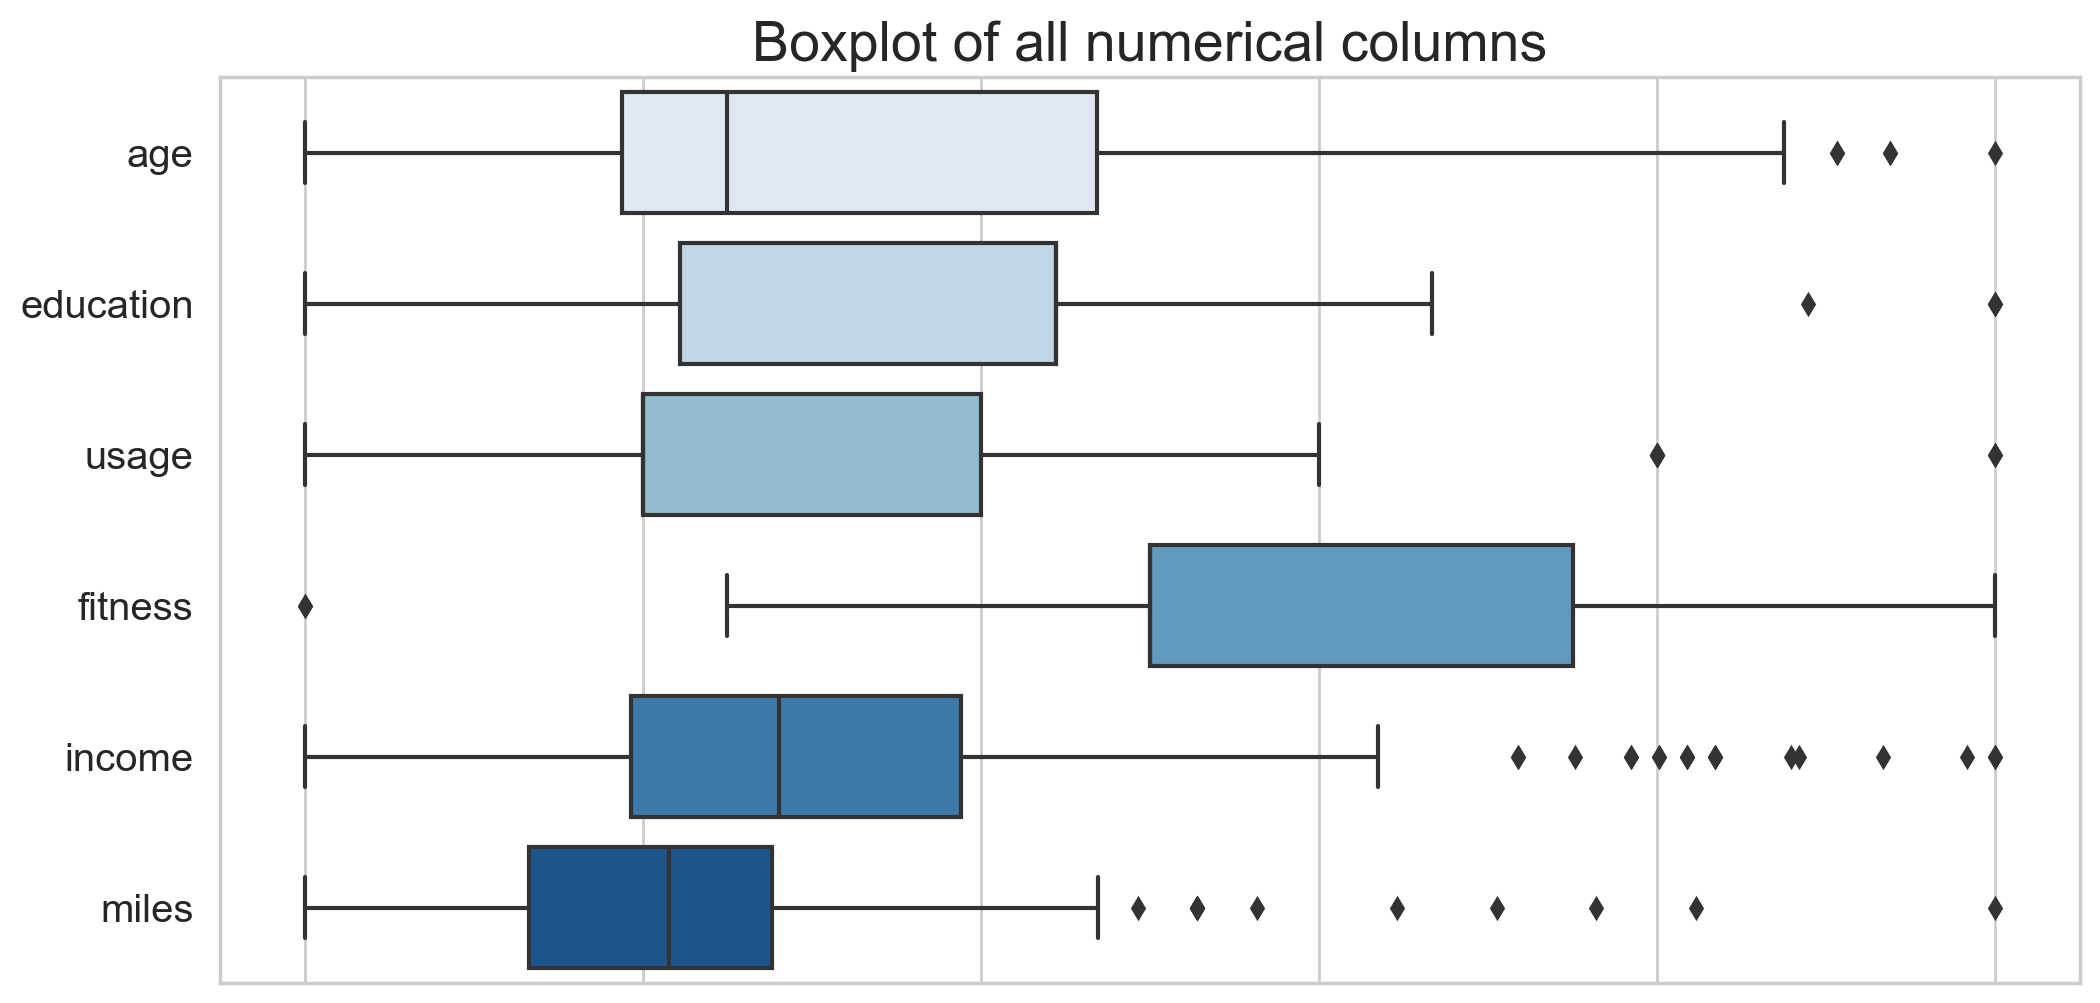

In [25]:
# min - max normalization to check at one scale
numerical_norm = (df[numerical_columns]- df[numerical_columns].min()) \
                    / (df[numerical_columns].max() - df[numerical_columns].min())
numerical_melted = pd.melt(numerical_norm)

plt.figure(figsize = (12, 6), dpi=200)
sns.boxplot(numerical_melted, x='value', y='variable', palette="Blues")

plt.title('Boxplot of all numerical columns', fontsize=20)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 12000x6000 with 0 Axes>

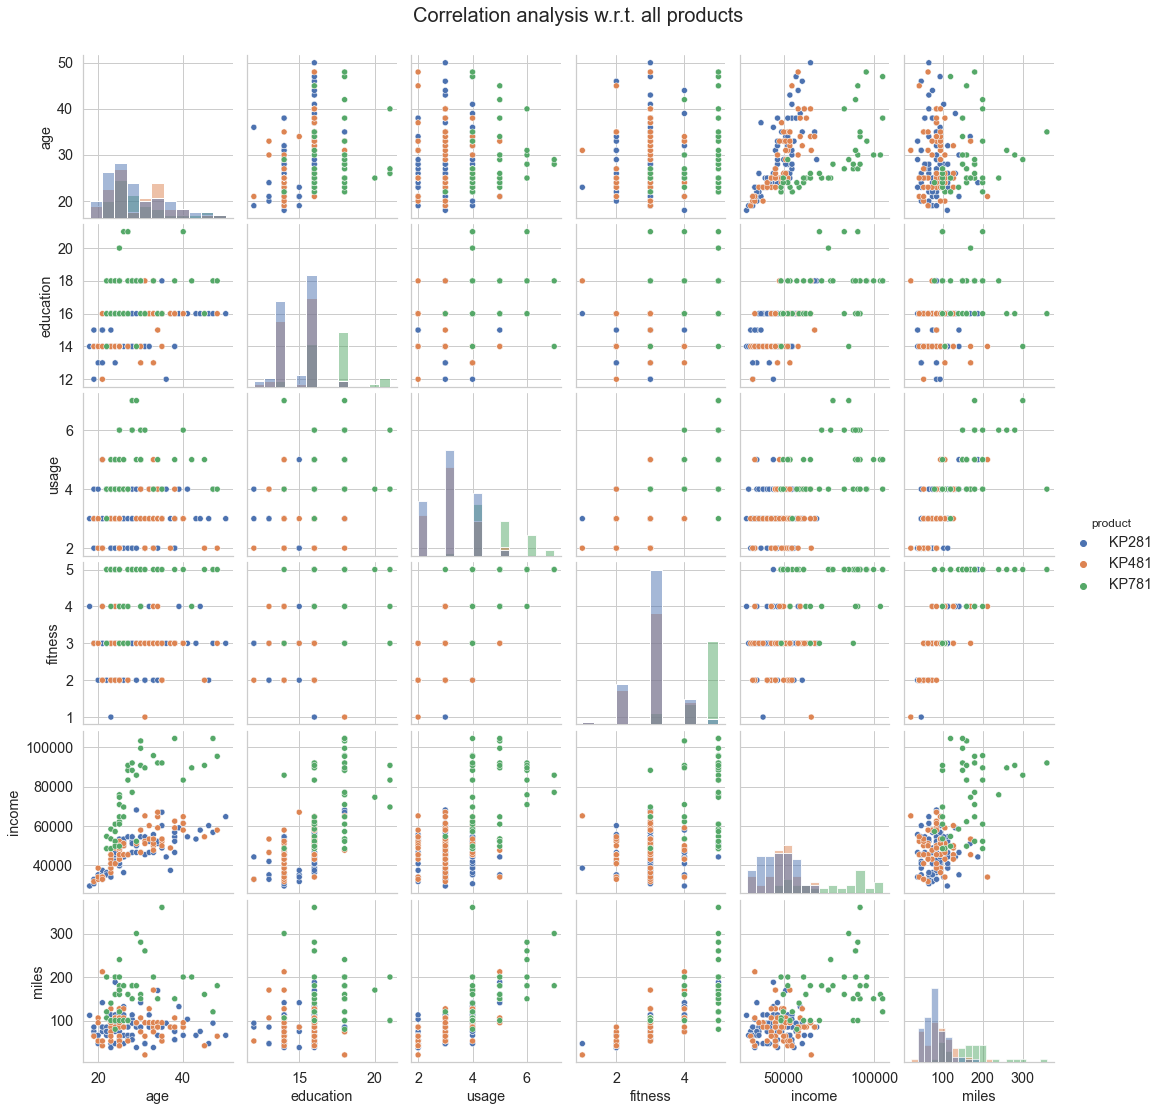

In [26]:
plt.figure(figsize=(20, 10), dpi=600)
sns.pairplot(data=df[list(numerical_columns) + ['product']], hue='product', diag_kind="hist")
plt.suptitle('Correlation analysis w.r.t. all products', fontsize=20, position=(0.5, 1.0+0.03))
plt.show()

In [27]:
# Some utility functions

def draw_plot_numerical(column, bins = 15, color='red'):
    fig = plt.figure(figsize = (16, 6), dpi=100)

    fig1 = fig.add_subplot(2,1,1)
    sns.histplot(x=df[column], kde='reg', bins=bins, color=color)
    plt.ylabel('')
    plt.xlabel('')

    fig.add_subplot(2,1,2, sharex=fig1)
    sns.boxplot(x=df[column], color=color)

    plt.suptitle(f'Analying {column} column', fontsize=20)
    plt.xlabel('')
    plt.xticks(np.linspace(df[column].min(), df[column].max(), num=bins+1))
    plt.show()
    
def describe_and_find_outliers(column):
    print('-'*100)
    print(df[column].describe().to_string())
    
    Q1 = df[column].quantile(.25)
    Q3 = df[column].quantile(.75)
    IQR = Q3 - Q1

    right = df[df[column] > (Q3 + 1.5 * IQR)]
    left = df[df[column] < (Q1 - 1.5 * IQR)]
    
    print('-'*100)
    if(len(left) > 0):
        print('\nOutliers on left extreme:-\n')
        print(left.to_string())
    else:
        print('No outliers on left extreme')
        
    print('-'*100)
    if(len(right) > 0) :
        print('\nOutliers on right extreme:-\n')
        print(right.to_string())
    else:
        print('No outliers on right extreme')
    
    print('-'*100)

## Age & Product

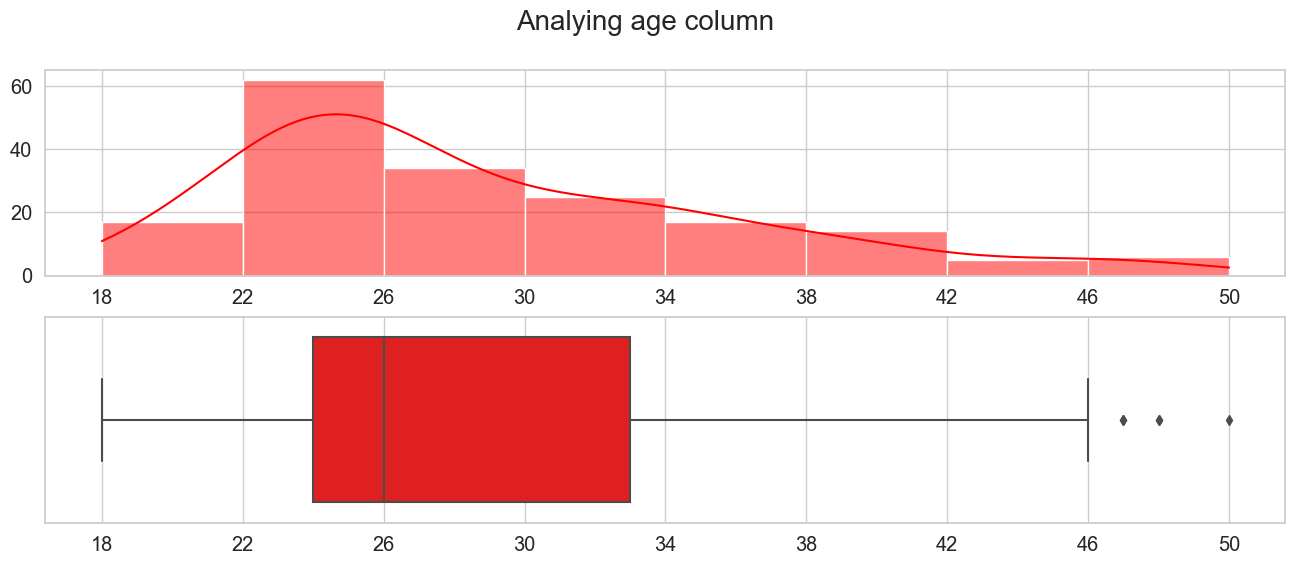

----------------------------------------------------------------------------------------------------
count    180.000000
mean      28.788889
std        6.943498
min       18.000000
25%       24.000000
50%       26.000000
75%       33.000000
max       50.000000
----------------------------------------------------------------------------------------------------
No outliers on left extreme
----------------------------------------------------------------------------------------------------

Outliers on right extreme:-

    product  age  gender  education maritalstatus  usage  fitness  income  miles
78    KP281   47    Male         16     Partnered      4        3   56850     94
79    KP281   50  Female         16     Partnered      3        3   64809     66
139   KP481   48    Male         16     Partnered      2        3   57987     64
178   KP781   47    Male         18     Partnered      4        5  104581    120
179   KP781   48    Male         18     Partnered      4        5   95508 

In [28]:
column = 'age'

draw_plot_numerical(column, 8)
describe_and_find_outliers(column)

In [29]:
df['age_groups'] = pd.cut(df['age'], bins=[17, 28, 39, 50], labels=['Young adults','Middle-aged adults','Old adults'])
df['age_groups'].value_counts()

age_groups
Young adults          107
Middle-aged adults     56
Old adults             17
Name: count, dtype: int64

In [30]:
round(pd.crosstab([df['age_groups']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
age_groups,,,,
Young adults,27.78%,17.78%,13.89%,59.44%
Middle-aged adults,12.78%,12.78%,5.56%,31.11%
Old adults,3.89%,2.78%,2.78%,9.44%
All,44.44%,33.33%,22.22%,100.0%


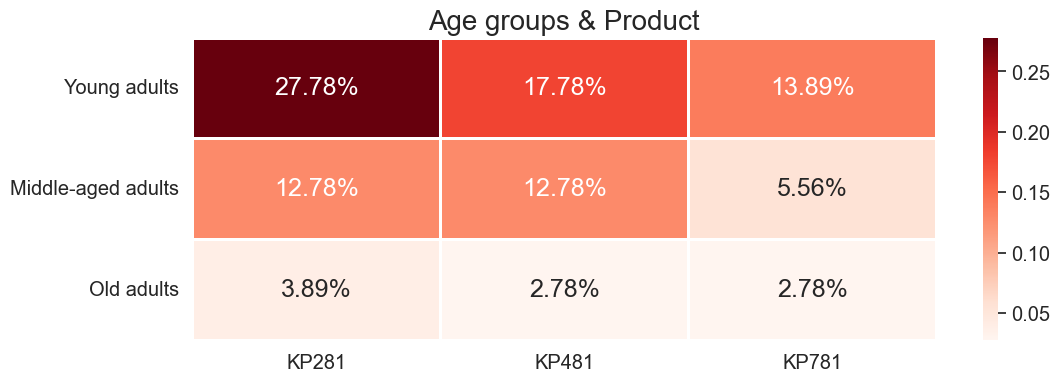

In [31]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['age_groups']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='Reds', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Age groups & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 800x800 with 0 Axes>

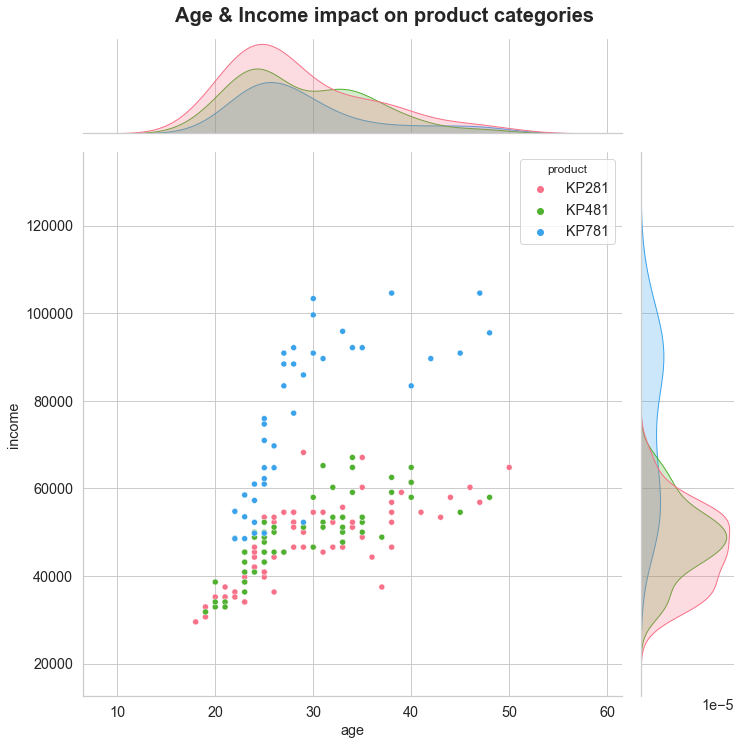

In [32]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='age', y='income', data=df, hue='product', height=10, palette='husl')
plt.suptitle('Age & Income impact on product categories',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

## Education & Product

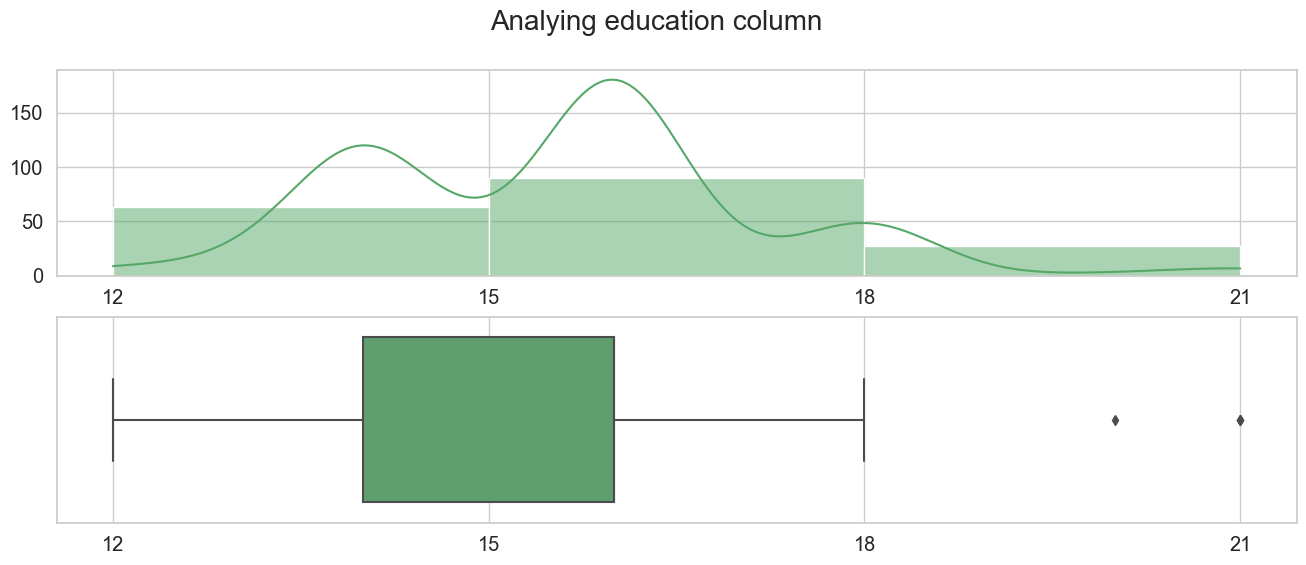

----------------------------------------------------------------------------------------------------
count    180.000000
mean      15.572222
std        1.617055
min       12.000000
25%       14.000000
50%       16.000000
75%       16.000000
max       21.000000
----------------------------------------------------------------------------------------------------
No outliers on left extreme
----------------------------------------------------------------------------------------------------

Outliers on right extreme:-

    product  age  gender  education maritalstatus  usage  fitness  income  miles    age_groups
156   KP781   25    Male         20     Partnered      4        5   74701    170  Young adults
157   KP781   26  Female         21        Single      4        3   69721    100  Young adults
161   KP781   27    Male         21     Partnered      4        4   90886    100  Young adults
175   KP781   40    Male         21        Single      6        5   83416    200    Old adults
----

In [33]:
column = 'education'

draw_plot_numerical(column, 3, color='g')
describe_and_find_outliers(column)

In [34]:
df['education_groups'] = pd.cut(df['education'], bins=[11, 15, 18, 21], labels=['Low', 'Medium', 'High'])
df['education_groups'].value_counts()

education_groups
Medium    108
Low        68
High        4
Name: count, dtype: int64

In [35]:
round(pd.crosstab([df['education_groups']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
education_groups,,,,
Low,21.67%,15.0%,1.11%,37.78%
Medium,22.78%,18.33%,18.89%,60.0%
High,0.0%,0.0%,2.22%,2.22%
All,44.44%,33.33%,22.22%,100.0%


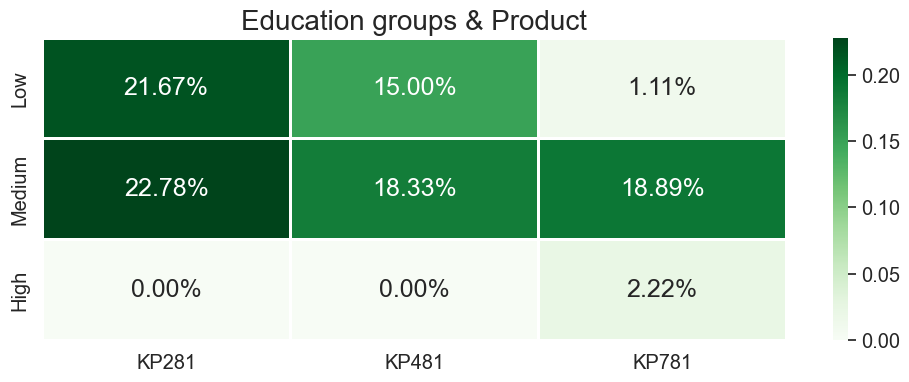

In [36]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['education_groups']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='Greens', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Education groups & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 800x800 with 0 Axes>

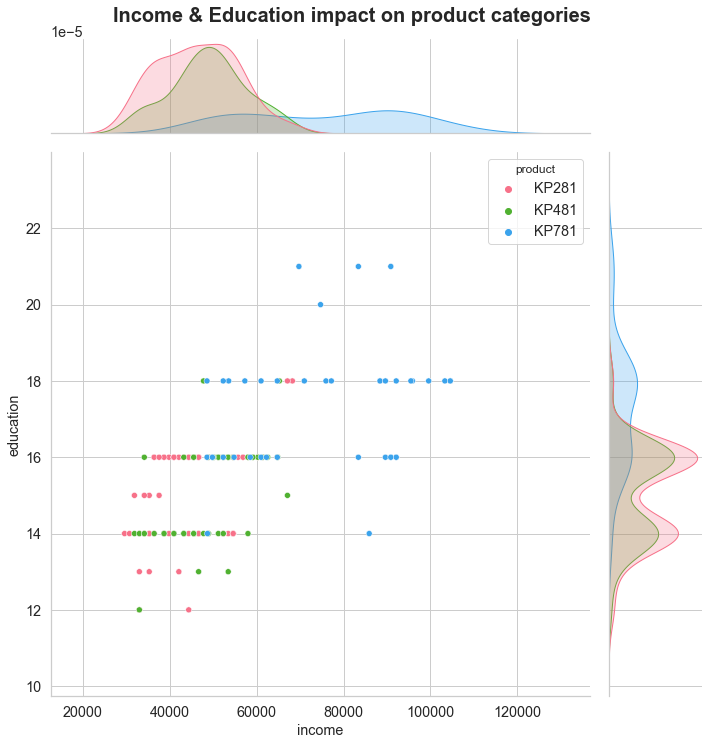

In [37]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='income', y='education', data=df, hue='product', height=10, palette='husl')
plt.suptitle('Income & Education impact on product categories',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

## Usage & Product

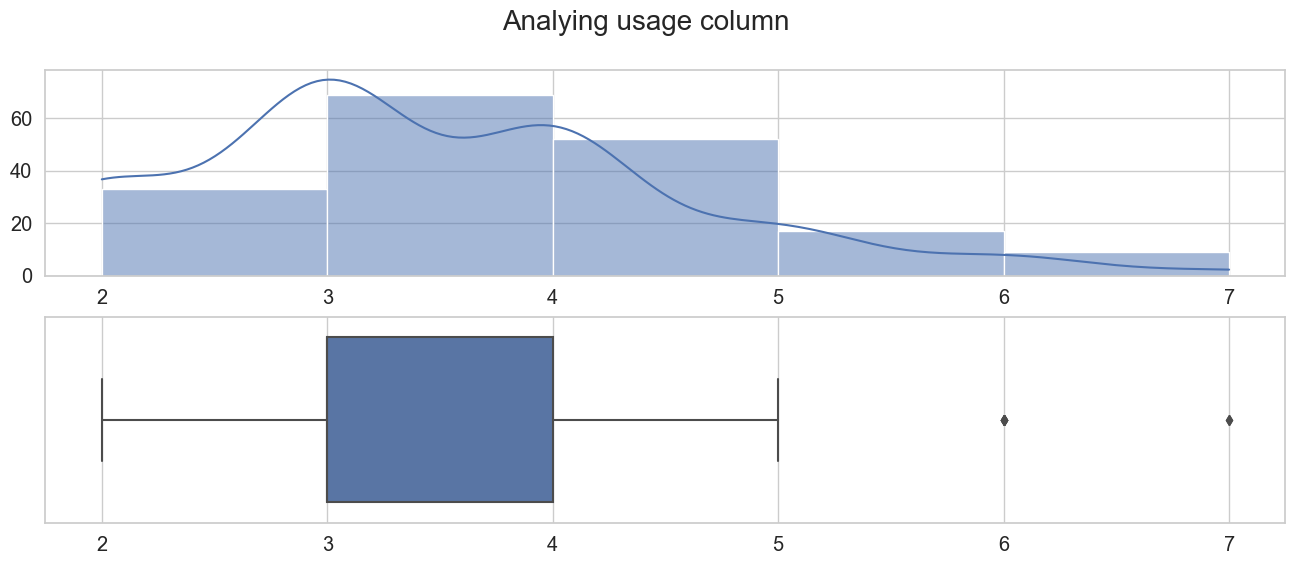

----------------------------------------------------------------------------------------------------
count    180.000000
mean       3.455556
std        1.084797
min        2.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        7.000000
----------------------------------------------------------------------------------------------------
No outliers on left extreme
----------------------------------------------------------------------------------------------------

Outliers on right extreme:-

    product  age  gender  education maritalstatus  usage  fitness  income  miles          age_groups education_groups
154   KP781   25    Male         18     Partnered      6        4   70966    180        Young adults           Medium
155   KP781   25    Male         18     Partnered      6        5   75946    240        Young adults           Medium
162   KP781   28  Female         18     Partnered      6        5   92131    180        Young adults           Medium
163   K

In [38]:
column = 'usage'

draw_plot_numerical(column, bins = 5, color ='b')
describe_and_find_outliers(column)

In [39]:
round(pd.crosstab([df['usage']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
usage,,,,
2,10.56%,7.78%,0.0%,18.33%
3,20.56%,17.22%,0.56%,38.33%
4,12.22%,6.67%,10.0%,28.89%
5,1.11%,1.67%,6.67%,9.44%
6,0.0%,0.0%,3.89%,3.89%
7,0.0%,0.0%,1.11%,1.11%
All,44.44%,33.33%,22.22%,100.0%


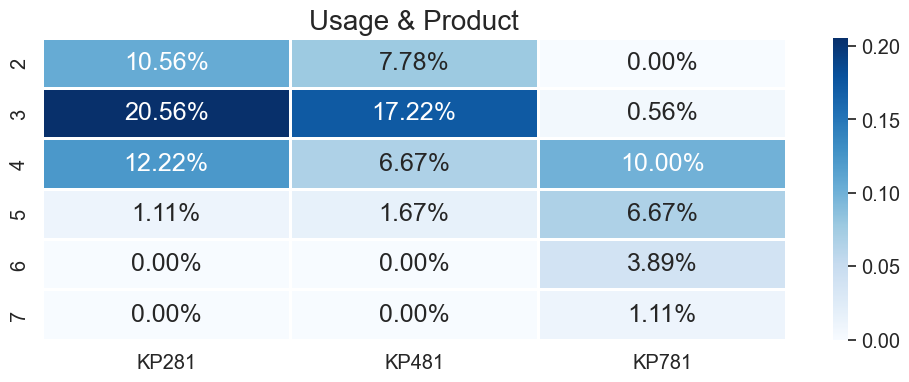

In [40]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['usage']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='Blues', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Usage & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 800x800 with 0 Axes>

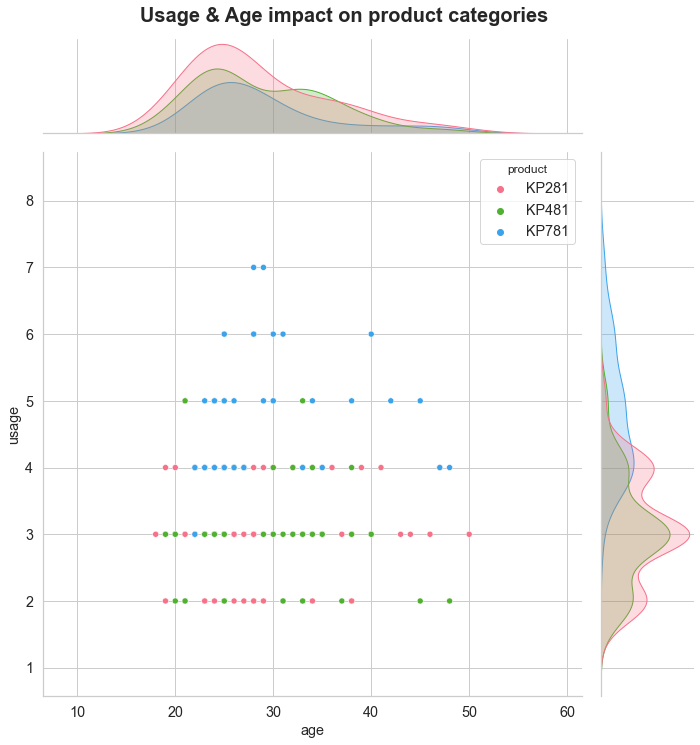

In [41]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='age', y='usage', data=df, hue='product', height=10, palette='husl')
plt.suptitle('Usage & Age impact on product categories',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

## Fitness & Product

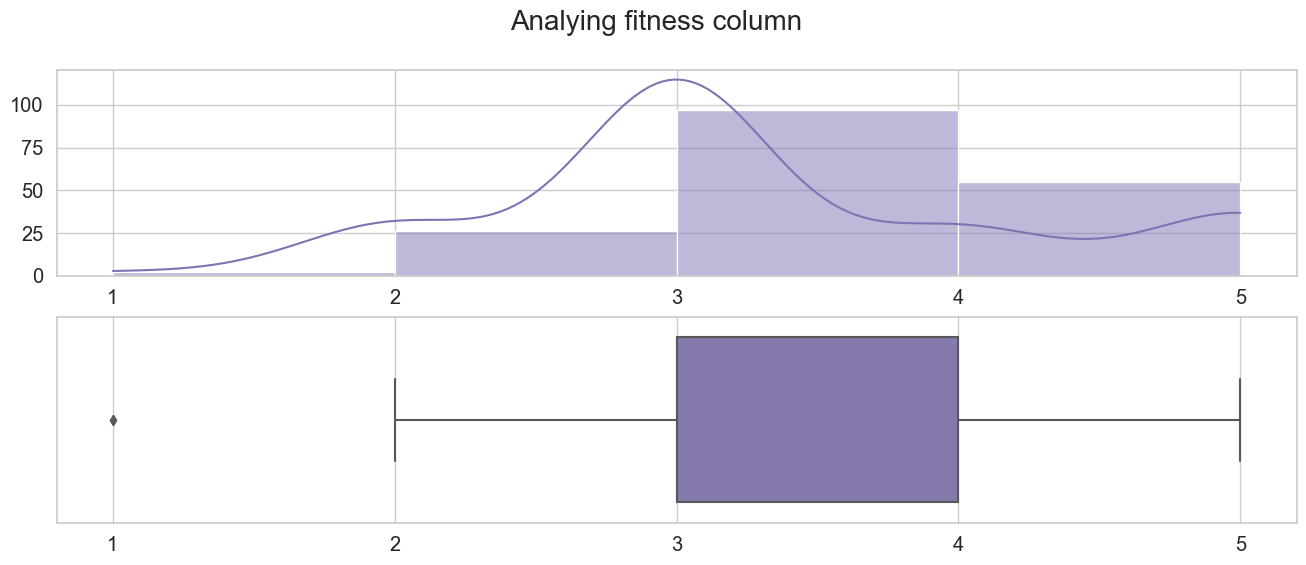

----------------------------------------------------------------------------------------------------
count    180.000000
mean       3.311111
std        0.958869
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
----------------------------------------------------------------------------------------------------

Outliers on left extreme:-

    product  age  gender  education maritalstatus  usage  fitness  income  miles          age_groups education_groups
14    KP281   23    Male         16     Partnered      3        1   38658     47        Young adults           Medium
117   KP481   31  Female         18        Single      2        1   65220     21  Middle-aged adults           Medium
----------------------------------------------------------------------------------------------------
No outliers on right extreme
----------------------------------------------------------------------------------------------------


In [42]:
column = 'fitness'

draw_plot_numerical(column, 4, color='m')
describe_and_find_outliers(column)

In [43]:
round(pd.crosstab([df['fitness']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
fitness,,,,
1,0.56%,0.56%,0.0%,1.11%
2,7.78%,6.67%,0.0%,14.44%
3,30.0%,21.67%,2.22%,53.89%
4,5.0%,4.44%,3.89%,13.33%
5,1.11%,0.0%,16.11%,17.22%
All,44.44%,33.33%,22.22%,100.0%


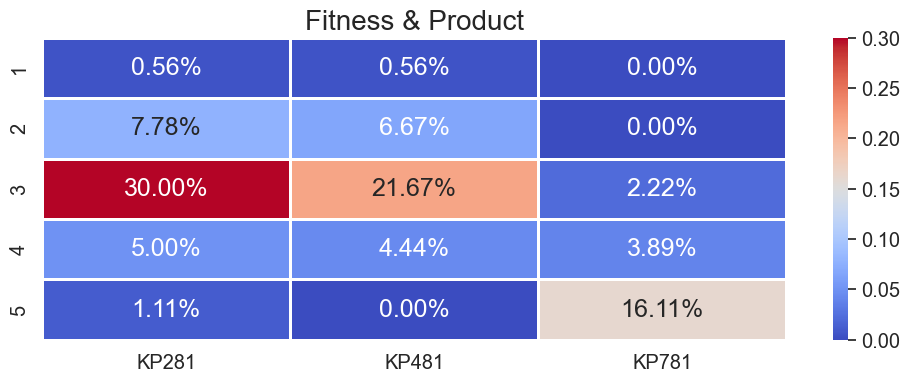

In [44]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['fitness']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='coolwarm', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Fitness & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 800x800 with 0 Axes>

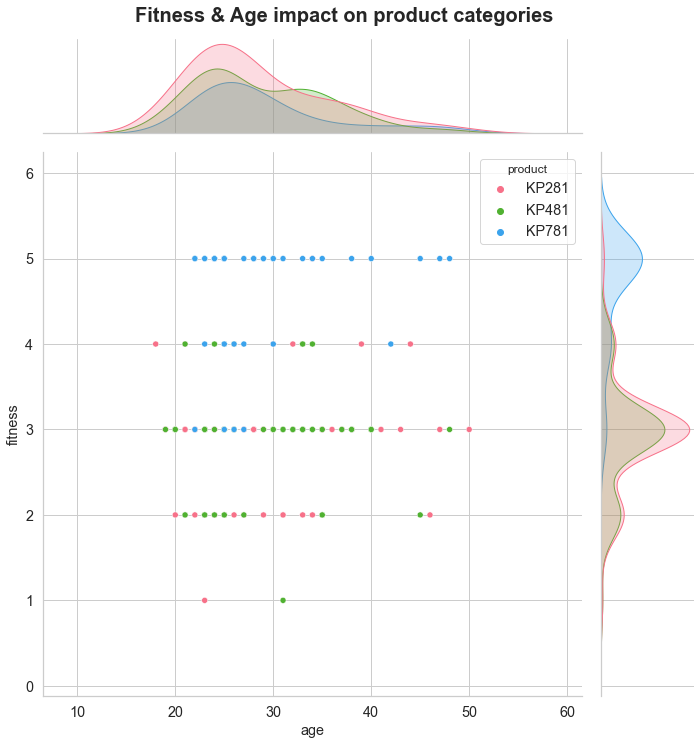

In [45]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='age', y='fitness', data=df, hue='product', height=10, palette='husl')
plt.suptitle('Fitness & Age impact on product categories',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

## Income & Product

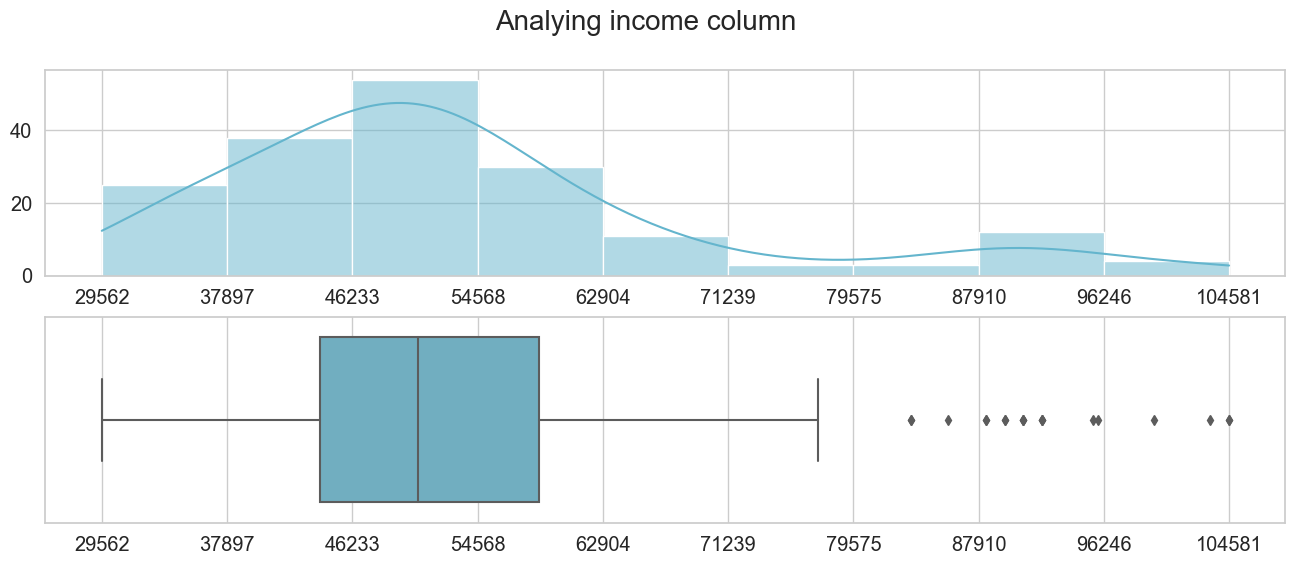

----------------------------------------------------------------------------------------------------
count       180.000000
mean      53719.577778
std       16506.684226
min       29562.000000
25%       44058.750000
50%       50596.500000
75%       58668.000000
max      104581.000000
----------------------------------------------------------------------------------------------------
No outliers on left extreme
----------------------------------------------------------------------------------------------------

Outliers on right extreme:-

    product  age  gender  education maritalstatus  usage  fitness  income  miles          age_groups education_groups
159   KP781   27    Male         16     Partnered      4        5   83416    160        Young adults           Medium
160   KP781   27    Male         18        Single      4        3   88396    100        Young adults           Medium
161   KP781   27    Male         21     Partnered      4        4   90886    100        Young adults 

In [46]:
column = 'income'

draw_plot_numerical(column, 9, color='c')
describe_and_find_outliers(column)

In [47]:
df['income_groups'] = pd.cut(df['income'], bins=[29000, 50000, 75000, 105000],labels=['Low', 'Medium', 'High'])
df['income_groups'].value_counts()

income_groups
Low       83
Medium    76
High      21
Name: count, dtype: int64

In [48]:
round(pd.crosstab([df['income_groups']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
income_groups,,,,
Low,26.67%,16.67%,2.78%,46.11%
Medium,17.78%,16.67%,7.78%,42.22%
High,0.0%,0.0%,11.67%,11.67%
All,44.44%,33.33%,22.22%,100.0%


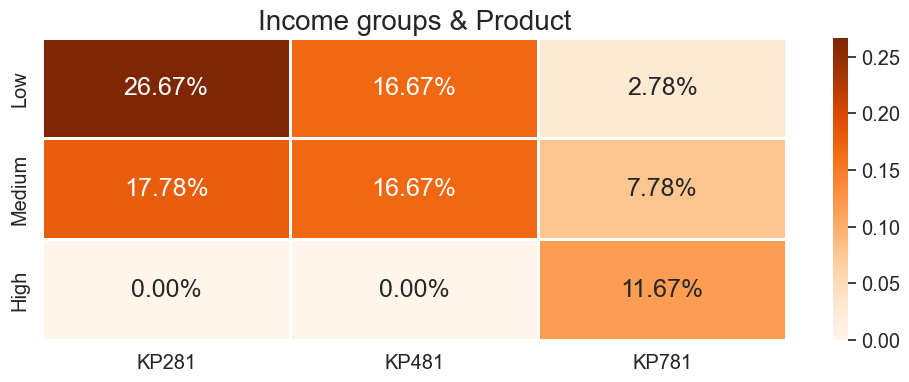

In [49]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['income_groups']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='Oranges', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Income groups & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 800x800 with 0 Axes>

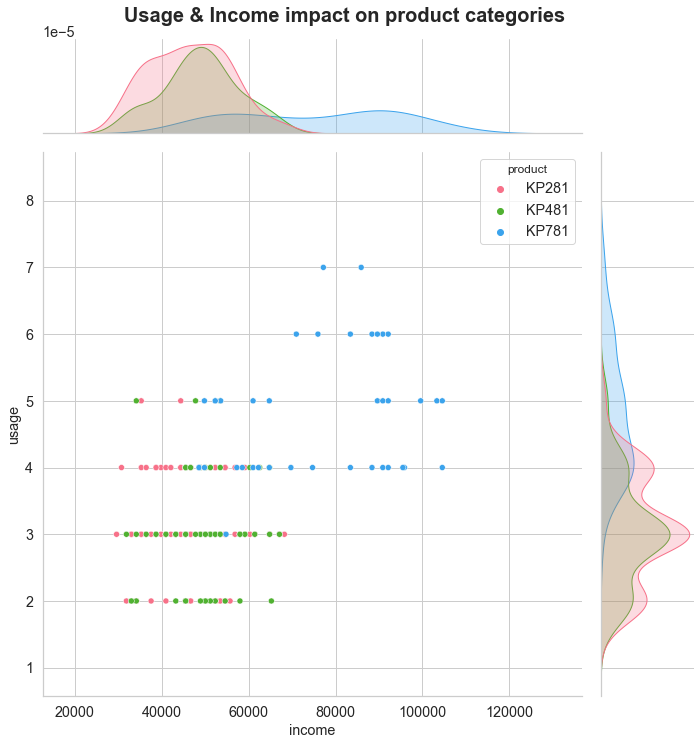

In [50]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='income', y='usage', data=df, hue='product', height=10, palette='husl')
plt.suptitle('Usage & Income impact on product categories',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

## Miles & Product

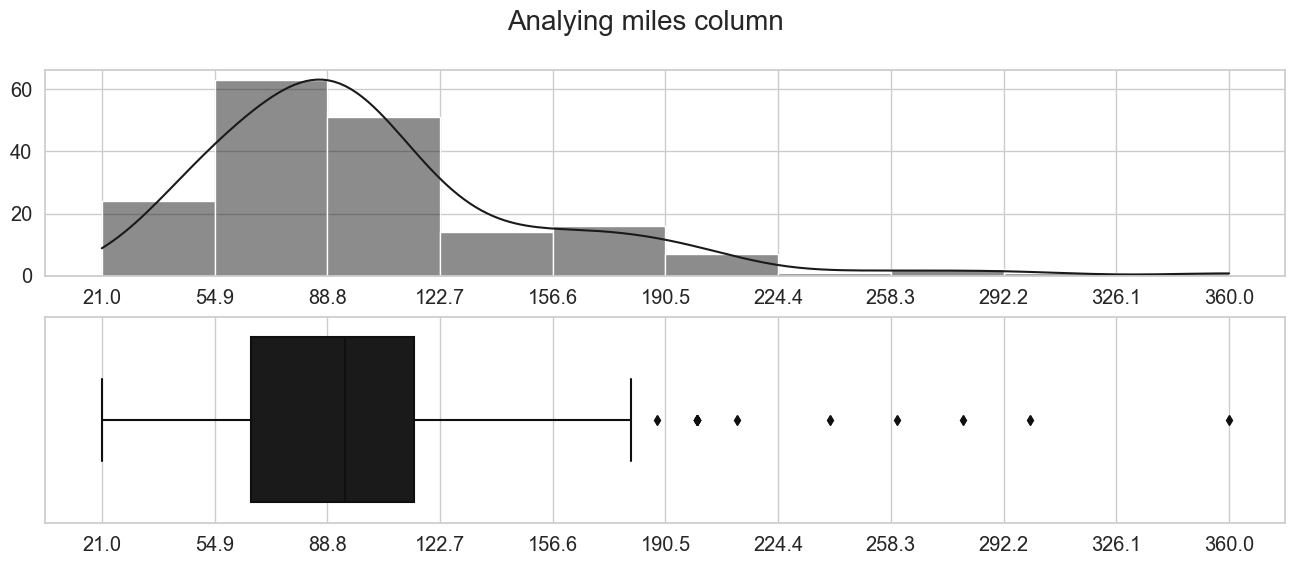

----------------------------------------------------------------------------------------------------
count    180.000000
mean     103.194444
std       51.863605
min       21.000000
25%       66.000000
50%       94.000000
75%      114.750000
max      360.000000
----------------------------------------------------------------------------------------------------
No outliers on left extreme
----------------------------------------------------------------------------------------------------

Outliers on right extreme:-

    product  age  gender  education maritalstatus  usage  fitness  income  miles          age_groups education_groups income_groups
23    KP281   24  Female         16     Partnered      5        5   44343    188        Young adults           Medium           Low
84    KP481   21  Female         14     Partnered      5        4   34110    212        Young adults              Low           Low
142   KP781   22    Male         18        Single      4        5   48556    200   

In [51]:
column = 'miles'

draw_plot_numerical(column, 10, color='k')
describe_and_find_outliers(column)

In [52]:
df['miles_groups'] = pd.cut(df['miles'], bins=[20, 100, 180, 361],labels=['Low', 'Medium', 'High'])
df['miles_groups'].value_counts()

miles_groups
Low       114
Medium     53
High       13
Name: count, dtype: int64

In [53]:
round(pd.crosstab([df['miles_groups']], df['product'], normalize=True, margins=True) * 100, 2).astype('str') + '%'

product,KP281,KP481,KP781,All
miles_groups,,,,
Low,34.44%,24.44%,4.44%,63.33%
Medium,9.44%,8.33%,11.67%,29.44%
High,0.56%,0.56%,6.11%,7.22%
All,44.44%,33.33%,22.22%,100.0%


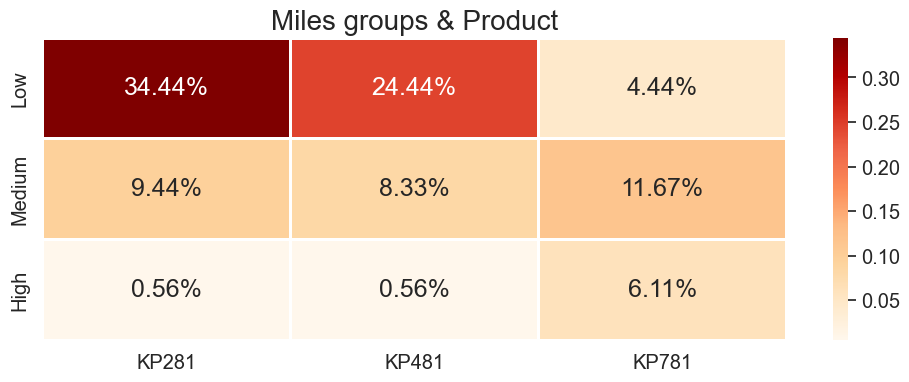

In [54]:
plt.figure(figsize=(12, 4), dpi=100)
heat_map_df = pd.crosstab([df['miles_groups']], df['product'], normalize=True)
sns.heatmap(data=heat_map_df, annot=True, cmap='OrRd', linewidths=1, annot_kws={"fontsize":18}, fmt='.2%')

plt.title('Miles groups & Product', fontsize=20)
plt.xlabel('')
plt.ylabel('')
plt.show()

<Figure size 800x800 with 0 Axes>

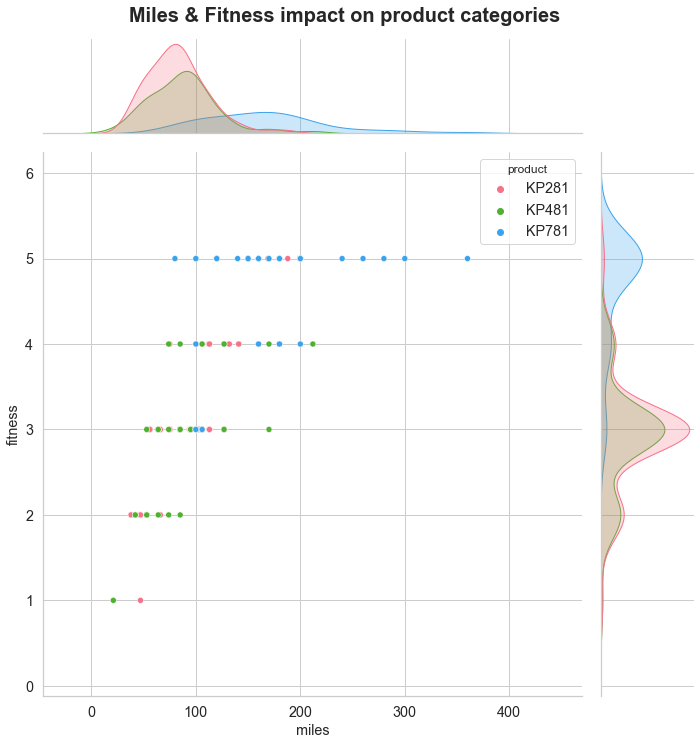

In [55]:
fig = plt.figure(figsize=(8, 8), dpi=100)
sns.jointplot(x='miles', y='fitness', data=df, hue='product', height=10, palette='husl')
plt.suptitle('Miles & Fitness impact on product categories',
             position=(0.5, 1.0+0.03), fontsize = 20, fontweight='bold')
plt.show()

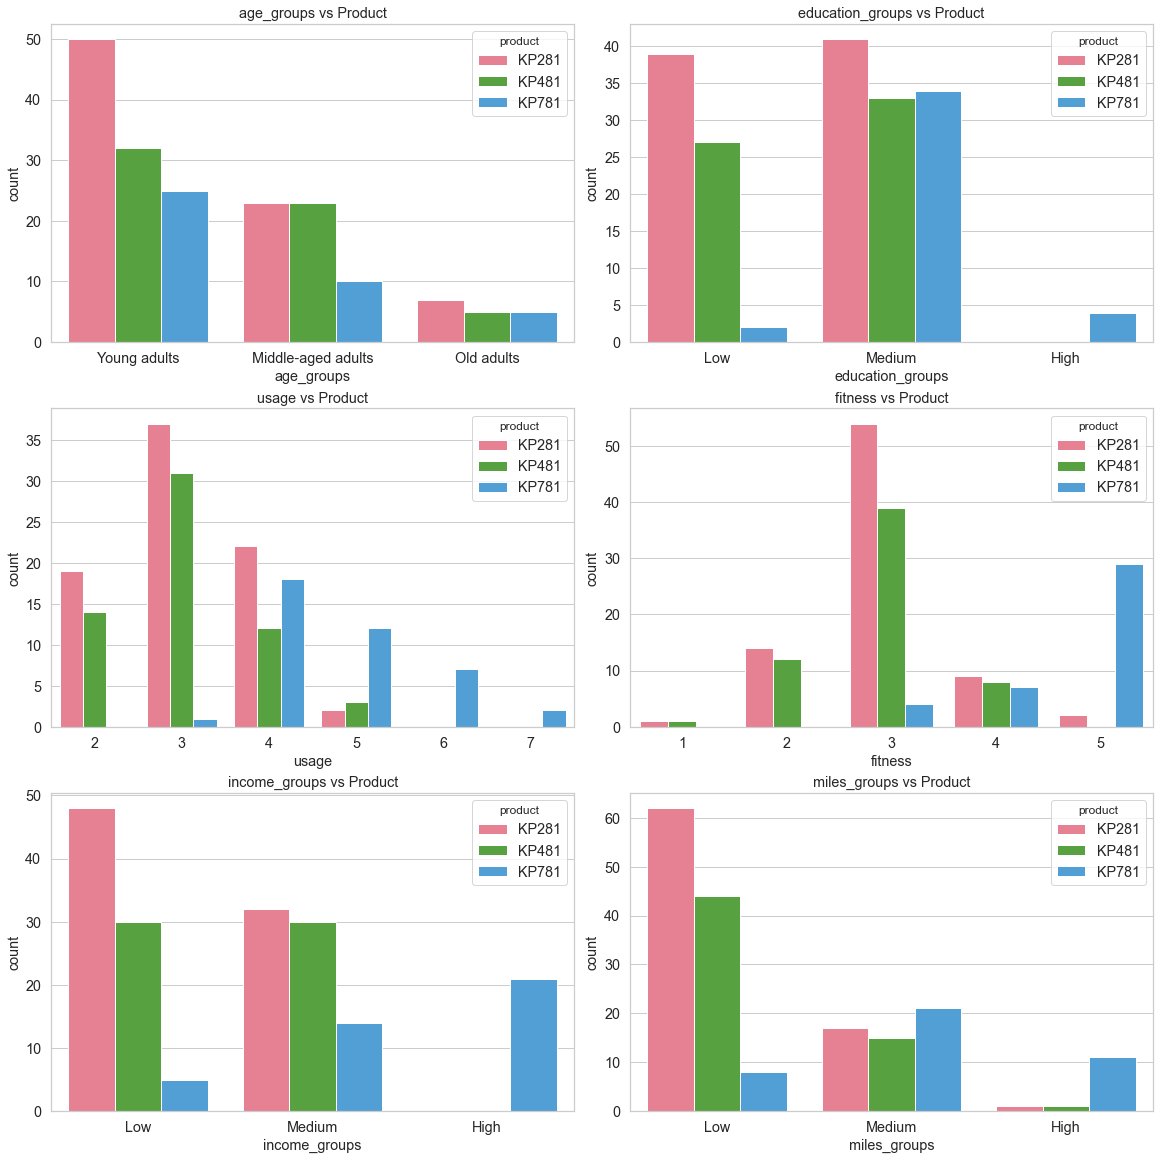

In [56]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 16), constrained_layout=True)

cols = ['miles_groups', 'income_groups', 'fitness', 'usage', 'education_groups', 'age_groups']
for i in range(len(ax)):
    for j in range(len(ax[i])):
        column = cols.pop()
        sns.countplot(data=df, x=column, hue='product', ax=ax[i][j], palette='husl')
        ax[i][j].set_title(f'{column} vs Product')

## Outlier Analysis

**Age:**
- Outliers are primarily on the right extreme (47 to 50 years old).
- Mostly partnered individuals.
- Usage of the treadmill is around 3 to 4 times a week.
- Income is relatively higher for these outliers.
- They tend to run a significant number of miles per week (64 to 180 miles).

**Education:**
- Outliers are primarily on the right extreme (20 to 21 years of education).
- Higher income for outliers with more education.

**Usage:**
- Outliers are primarily on the right extreme, with treadmill usage of 6 to 7 times a week.
- Mostly partnered individuals.
- Income tends to be higher for these outliers.

**Fitness:**
- Outliers are primarily on the left extreme (fitness level 1).
- Mostly partnered individuals.
- Usage is around 2 to 3 times a week for these outliers.

**Income:**
- Outliers are primarily on the right extreme, with incomes higher than the majority.
- Tend to run a significant number of miles per week (100 to 360 miles) for these outliers.

**Miles:**
- Outliers are primarily on the right extreme, running a high number of miles per week (188 to 360 miles).
- Mostly partnered individuals.
- Income tends to be higher for these outliers.

## Customer Profiling 


### KP281 Treadmill:
- **Potential Buyers:**
  - Gender: Both male and female customers.
  - Marital Status: Both partnered or single customers.
  - Age: 18-29 years.
  - Income: 29000-50000 USD.
  - Education: 14-16 years.
  - Fitness Level: 3.
  - Usage: Use treadmill 3 times a week.
  - Miles: Runs 60-100 miles per week.
  - Additional Preferences: 
    - Highest chances among other products.
    - Prefer usage under 4 days per week.
    - Fitness level mostly under 3.
    - Less to medium-earning customers.
    
    
### KP481 Treadmill:
- **Potential Buyers:**
  - Gender: Both male and female customers.
  - Marital Status: Both partnered or single customers.
  - Age: 18-39 years.
  - Income: 29000-75000 USD.
  - Education: 14-16 years.
  - Fitness Level: 3.
  - Usage: Use treadmill 3 times a week.
  - Miles: Runs 80-120 miles per week (mostly mid-runners).
  - Additional Preferences: 
    - Second popular product.
    - Prefer usage under 4 days per week.
    - Fitness level mostly under 3.
    - Less to medium-earning customers.
    
    
### KP781 Treadmill:
- **Potential Buyers:**
  - Gender: Primarily male customers.
  - Marital Status: Preferably married customers.
  - Age: 18-39 years.
  - Income: 75000-105000 USD.
  - Education: 16-18 years.
  - Fitness Level: 5.
  - Usage: Use treadmill 3 times a week.
  - Miles: Runs 120-200 miles per week (mostly hardcore runners).
  - Additional Preferences: 
    - Prefer usage more than 120 miles per week.
    - Prefer fitness level more than 3.
    - Prefer usage more than 4 days per week.
    - High-salaried customers.

## Insights

- **Treadmill Preferences:**
  - 44.44% of users prefer KP281.
  - 33.33% of users opt for KP481.
  - Only 22.22% of users favor KP781.

- **Age Group Preferences:**
  - Approximately 64% of Aerofit Treadmill users are aged 20-30.
  - 27.78% of users belong to the age group 30-39.
  - 9.4% of users are in the age group 40-50.

- **Gender Preferences:**
  - Aerofit has 57.78% male customers and 42.22% female customers.

- **Income Group Preferences:**
  - Approximately 88% of customers belong to low-income (29000-50000 USD) and medium-income (51000-75000 USD) groups.
  - The remaining 11.67% belong to the high-income group (above 75000 USD).

- **Education Level Preferences:**
  - Customers with 14-16 years of education prefer KP281 and KP481 treadmills.
  - Majority of customers with 16-18 years of education prefer KP781 treadmill.

- **Fitness Level Preferences:**
  - Majority of customers possess fitness level 3, aligning with a higher likelihood of purchasing treadmills.

- **Exercise Frequency Preferences:**
  - The majority of customers who use treadmills three times a week prefer both KP281 and KP481.
  - Customers who use treadmills 4-5 times a week favor the KP781 treadmill.

- **Running Mileage Preferences:**
  - Customers running 60-100 miles per week prefer KP281 treadmill.
  - Mid runners running 60-120 miles per week opt for the KP481.
  - Hardcore runners averaging 120-200 miles per week prefer the KP781 treadmill.

- **Marital Status Preferences:**
  - 59.4% of Aerofit customers are married, while 40.56% are single.
  - Married customers have a higher frequency of purchasing all treadmills compared to single customers.

- **Treadmill Preferences by Marital Status:**
  - Among married customers:
    - 44.9% prefer KP281.
    - 33.6% prefer KP481.
    - 21.7% prefer KP781.
  - Among single customers:
    - 43.8% prefer KP281.
    - 32.9% prefer KP481.
    - 23.3% prefer KP781.

- **Treadmill Preferences by Gender:**
  - Among male customers:
    - 38.5% prefer KP281.
    - 29.8% prefer KP481.
    - 31.7% prefer KP781.
  - Among female customers:
    - 52.6% prefer KP281.
    - 38.2% prefer KP481.
    - 9.2% prefer KP781.

- **Probability of Treadmill Purchase by Age Group:**
  - Probability of young customers purchasing:
    - KP281: 29%
    - KP481: 18%
    - KP781: 15%
  - Probability of middle-aged customers purchasing:
    - KP281: 11%
    - KP481: 12%
    - KP781: 4%
  - Probability of old customers purchasing:
    - KP281: 4%
    - KP481: 3%
    - KP781: 3%

- **Other Insights:**
  - KP281, being entry-level and affordable, is the most preferred treadmill.
  - KP481 is favored by mid-level runners due to its value-for-money offering.
  - KP781, being more advanced and costly, is chosen by a smaller proportion of customers.

## Recommendations


### KP281 Treadmill:
- **Budget-Friendly Appeal:**
  - Emphasize the affordability of KP281 to attract more customers.
  - Highlight key entry-level features appealing to fitness enthusiasts.
  - Offer special discounts to entice cost-conscious customers.

### KP481 Treadmill:
- **Tailored to Mid-Level Runners:**
  - Focus marketing efforts on mid-level runners, showcasing KP481's fitness benefits.
  - Highlight competitive pricing and outstanding features to emphasize cost-effectiveness.

### KP781 Treadmill:
- **Leverage Advanced Capabilities:**
  - Targeted marketing campaigns should raise awareness about KP781's advanced capabilities.
  - Showcase unique features to justify the higher price and enhance the workout experience.

### Attracting Female Customers:
- **Appealing to Female Audience:**
  - Design advertisements and promotions to resonate with women and highlight female-friendly features.
  - Offer diverse treadmill models catering to various fitness levels and preferences.

### Targeting Single Customers:
- **Collaboration with Influencer:**
  - Appoint a fitness-oriented brand ambassador like Virat Kohli to engage and inspire single customers.
  - Provide exclusive offers and discounts to entice single customers, boosting their interest in Aerofit treadmills.

### Catering to Older Customers:
- **Personalized Assistance:**
  - Offer personalized assistance to help customers aged 40-50 choose the ideal treadmill, encouraging an active lifestyle.

### Addressing Income Group Challenges:
- **Affordability Solutions:**
  - Tailor discounts and incentives for low and middle-income groups to make KP781 more accessible.
  - Provide EMI payment options to ease financial burden for these income segments.

### Smart Promotion Strategies:
- **Targeted Advertising:**
  - Promote KP781 to high-salaried individuals and emphasize premium product benefits.
  - Leverage personalized ads on e-commerce and social media platforms for effective reach and engagement.